# Question 1

Gerstner et al, Eq (8.37): 
$$P^{trans}(u,t+\Delta t|u',t) = [1-\Delta t \sum_kv_k(t)]\delta(u-u'e^{{-\Delta t}/\tau_M}) + \Delta t \sum_kv_k(t)\delta(u-u'e^{{-\Delta t}/\tau_M}-w_k) $$

We substitute this into Eq (8.38)

$$p(u,t + \Delta t) = \int P^{trans}(u,t+\Delta t|u',t)p(u',t)du' $$

:: $$ p(u,t + \Delta t) = [1-\Delta t \sum_kv_k(t)] \int \delta(u-u'e^{{-\Delta t}/\tau_M})p(u',t)du' + \Delta t \sum_kv_k(t) \int \delta(u-u'e^{{-\Delta t}/\tau_M}-w_k)p(u',t)du'$$

which rearranges to 
$$ p(u,t + \Delta t) = [1-\Delta t \sum_kv_k(t)] \int \delta(-e^{{-\Delta t}/\tau_M}(u' - ue^{{\Delta t}/\tau_M}))p(u',t)du'+ \Delta t \sum_kv_k(t) \int \delta(-e^{{-\Delta t}/\tau_M}(u'-ue^{{\Delta t}/\tau_M}-w_k))p(u',t)du'.$$

Using $\delta(ax) = |a^{-1}|\delta(x)$,

$$p(u,t + \Delta t) = [1-\Delta t \sum_kv_k(t)] e^{{\Delta t}/\tau_M}\int \delta((u' - ue^{{\Delta t}/\tau_M}))p(u',t)du'+ \Delta t \sum_kv_k(t) e^{{\Delta t}/\tau_M}\int \delta((u'-ue^{{\Delta t}/\tau_M}-w_k))p(u',t)du'. $$

Using $\int f(x)\delta(x-a)dx = f(a)$, we get Eq (8.39): 

$$ p(u,t + \Delta t) = [1-\Delta t \sum_kv_k(t)] e^{{\Delta t}/\tau_M} p(e^{{\Delta t}/\tau_M}u,t) + \Delta t \sum_kv_k(t) e^{{\Delta t}/\tau_M} p(e^{{\Delta t}/\tau_M}u-w_k,t).$$

Using the Taylor expansion of $e^{{\Delta t}/\tau_M}$, we get (lecture 15) $p(e^{{\Delta t}/\tau_M}u,t) \approx p(u+u\frac{\Delta t}{\tau_M},t) \approx p(u,t) + \frac{\Delta t}{\tau_M} u \frac{d}{du}p(u,t)$. $p(e^{{\Delta t}/\tau_M}u-w_k,t)$ expands similarly to give

$$p(u,t + \Delta t)-p(u,t) \approx  [1-\Delta t \sum_kv_k(t)]\Big(1+\frac{\Delta t}{\tau_M}\Big)\Big[p(u,t) + \frac{\Delta t}{\tau_M}u\frac{d}{du}p(u,t)\Big] + \Delta t \sum_kv_k(t)\Big(1 + \frac{\Delta t}{\tau_M}\Big)\big[p(u-w_k,t) + \frac{\Delta t}{\tau_M}u\frac{d}{du}p(u-w_k,t)\big] - p(u,t)$$

Multiplying out and dropping $(\Delta t)^2$ terms, 

$$ p(u,t + \Delta t)-p(u,t) \approx  p(u,t) - \Delta t \sum_kv_k(t)p(u,t) + \frac{\Delta t}{\tau_M}p(u,t) + \frac{\Delta t}{\tau_M}u\frac{d}{du}p(u,t) + \Delta t \sum_kv_k(t)p(u-w_k,t)$$

Which simplifies (dividing by $\Delta t$) to Eq (8.40):

$$\frac{p(u,t+\Delta t)-p(u,t)}{\Delta t} = \frac{1}{\tau_M}p(u,t) + \frac{1}{\tau_M}u\frac{d}{du}p(u,t) + \Delta t \sum_kv_k(t)\big[p(u-w_k,t) - p(u,t)\big] $$

When $w_k$ is sufficiently small, we can use the Taylor approximation $p(u-w_k,t) \approx p(u,t) -w_k\frac{d}{du}p(u,t) + \frac{w_k^2}{2}\frac{d^2}{du^2}p(u,t)$ to get (taking the limit $\Delta t \rightarrow 0$ and multiplying by $\tau_M$)

$$\tau_M\frac{d}{dt}p(u,t) = p(u,t) + u\frac{d}{du}p(u,t) + \tau_M\sum_kv_k(t)\Big[ p(u,t) -w_k\frac{d}{du}p(u,t) + \frac{w_k^2}{2}\frac{d^2}{du^2}p(u,t) -p(u,t)\Big]$$ 

which simplifies to 

$$ \tau_M\frac{d}{dt}p(u,t) = \frac{d}{du}[up(u,t)] - \tau_M \sum_kv_k(t)\big[w_k\frac{d}{du}p(u,t) + \frac{w_k^2}{2}\frac{d^2}{du^2}p(u,t)\big]$$

which with a little rearranging becomes Eq (8.41):

$$\tau_M\frac{d}{dt}p(u,t) = -\frac{d}{du}\big[-u + \tau_M\sum_kv_k(t)w_k\big]p(u,t) + \frac{1}{2}\big[\tau_M\sum_kv_k(t)w_k^2\big]\frac{d^2}{du^2}p(u,t) $$

# Question 1, cont...
Simulate an integrate and fire neuron with Poisson input without threshold to verify that after sufficient time the membrane potential follows the distribution given by Eq. 8.46. You may do this by either running a long simulation and sampling the potential at different times, or by running many simulations.

In [5]:
# integrate and fire

# The Fokker-Planck equation (8.41), is equivalent to (8.7) 
# with RI(t) = tauM Sigma_k v_k(t) w_k and time-dependent noise 
# amplitude sigma^2(t) = tau_m Sigma_k v_k(t) w^2_k. (pg 271, Gerstner et al)

#(8.7) tau_m du/dt = -u(t) + RI(t) + noise

#Implemented by (8.8):
#du = (-u + RI)dt/tau_m + sigma*sqrt(dt)*random.normal
 

import numpy as np

# set parameters
numSteps = 5000000
dt = .00001
w_k = .001; tauM = 1; v_k = .001

# initialize
U_poisson = np.zeros(numSteps)+.000001
U_langevin = np.zeros(numSteps)

# simulate both poisson and langevin versions
for t in range(1,numSteps-1):
    if np.random.rand() <= v_k:
        U_poisson[t+1] = U_poisson[t]*np.exp(-dt/tauM) + w_k
    else:
        U_poisson[t+1] = U_poisson[t] * np.exp(-dt/tauM)
        
    U_langevin[t+1] = (U_langevin[t] + dt*((-U_langevin[t] + w_k*v_k*tauM)/tauM) + 
                       np.sqrt(tauM*v_k*w_k**2*dt)*np.random.normal())

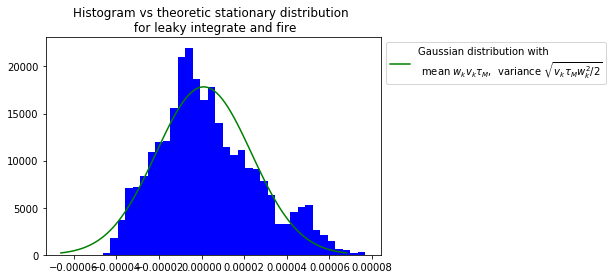

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

start = 2500000

# Plot sample of langevin points
sample_L = U_langevin[start::50]
plt.hist(sample_L, bins = 35,density = True,color = 'blue')

# This would be for the Poisson version, but that didn't work correctly.
#sample_P = U_poisson[start::1000]
#plt.hist(sample_P, bins = 300,density = True,color = 'orange')

# Plot theoretic stationary distribution
mu = (w_k*v_k*tauM)
variance = tauM*v_k*w_k**2/2
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'green', label= "Gaussian distribution with"
         +"\n" +" mean " + r"$ w_kv_k\tau_M$"+",  variance "+r"$\sqrt{v_k\tau_Mw_k^2/2}$")

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("Histogram vs theoretic stationary distribution \n for leaky integrate and fire")
plt.show()
#sample_P

# Question 2
Compare expected first passage time with simulation results for hitting threshold.

Using the simplified version of (5.2.158) (Gardiner) given at the end of lecture 16, 
$$E[T(x)] = \frac{e^{-\mu x}}{A(e^{\mu a}-e^{\mu b})}\Big[a(e^{\mu(a+b)}-e^{\mu(a+x)})+b(e^{\mu(a+b)}-e^{\mu(b+x)})+x(e^{\mu(b+x)}-e^{\mu(a+x)})\Big] $$
with the values upper threshold $b$, initial point $x = 0$, $A = v_kw_k\tau_M$, $B = v_kw_k^2\tau_M$, and $\mu = 2A/B = \frac{2}{w_k}$.
As the lower boundary $a$ approaches $-\infty$, this simplifies to $\frac{1}{A}$.

In [42]:
from numba import jit, prange
import numpy as np

# Returns the result of the above equation
@jit
def ET(a,b,x,vk,wk,tauM):

    A = vk*wk*tauM
    B = vk*wk**2*tauM

    mu = 2/wk
    def ee(arg):
        ee = np.exp(mu*arg)
        return ee
    
    part1 = ee(-x)/(A*(ee(a)-ee(b)))
    part2 = (a*(ee(a+b)-ee(a+x))
            + b*(ee(a+b)-ee(b+x))
            + x*(ee(b+x)-ee(a+x)))

    return part1*part2

@jit
def simET(th,x,vk,wk,tauM,numTrials):
    timeList = np.zeros(numTrials)
    dt = th*(.0000001)
    sqdt = np.sqrt(dt)
    sigma = np.sqrt(tauM*vk*wk*wk)
    
    for i in prange(numTrials):
        time = 0
        U = x
        while U <= th:
            U = U + dt*((-U + wk*vk*tauM)/tauM) + sigma*sqdt*np.random.normal()
            time += dt
            
        timeList[i] = time
    
    return np.mean(timeList)

# The above, but without the parallel processing
@jit
def simETNone(th,x,vk,wk,tauM,numTrials):
    timeList = np.zeros(numTrials)
    dt = th*.1
    
    
    for i in range(numTrials):
        time = 0
        U = x
        while U < th:
            U = U + dt*((-U + wk*vk*tauM)/tauM) + np.sqrt(2*tauM*vk*wk**2*dt)*np.random.normal()
            time += dt
            
        timeList[i] = time
        print("finished trial " + str(i))
    
    return np.mean(timeList)



In [5]:
numTrials = 3
wk = .01; tauM = 1; vk = .001
x = 0
lower_thresholds = [-.00001,-.001,-.1,-1,-1.0,-1.25,-1.5]
upper_th = .0001
#ths = [-1,-1]
ETs = [ET(lower_th,upper_th,x,vk,wk,tauM) for lower_th in lower_thresholds]
simETs = simET(upper_th,x,vk,wk,tauM,numTrials)

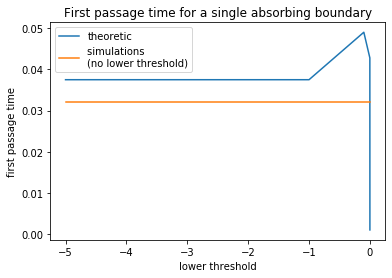

In [47]:
import matplotlib.pyplot as plt
numTrials = 1500
wk = .1; tauM = 1; vk = .1
x = 0
lower_thresholds = [-.00001,-.001,-.1,-1,-1.0,-1.25,-1.5,-3,-5]
upper_th = .00075
#ths = [-1,-1]
ETs = [ET(lower_th,upper_th,x,vk,wk,tauM) for lower_th in lower_thresholds]
simETs = simET(upper_th,x,vk,wk,tauM,numTrials)


plt.plot(lower_thresholds,ETs, label = "theoretic")
plt.plot(lower_thresholds,np.repeat(simETs,len(lower_thresholds)),label = "simulations "+ "\n"+"(no lower threshold)")

plt.ylabel("first passage time")
plt.xlabel("lower threshold")
plt.legend()
plt.title("First passage time for a single absorbing boundary")
plt.show()

# Question 3
 
Suppose the times between spikes are distributed according to a gamma distribution $\Gamma(\alpha,\beta)$. 

a) Compute coefficient of variation of interspike interval
$$\mu_\Gamma = \frac{\alpha}{\beta}, \sigma^2_\Gamma = \frac{\alpha}{\beta^2} $$
$$c_{V_\Gamma} =  \frac{\sigma_\Gamma}{\mu_\Gamma} = \sqrt{\frac{\alpha}{\beta^2}}\frac{\beta}{\alpha} = \frac{1}{\sqrt{\alpha}}$$

b) Compute the same for an Erlang distribution with parameters $k$, $\lambda$.
$$\mu_{Erl} = \frac{k}{\lambda}, \sigma^2_{Erl} = \frac{k}{\lambda^2} $$
$$c_{V_{Erl}} = \frac{\sigma_{Erl}}{\mu_{Erl}} = \sqrt{\frac{k}{\lambda^2}}\frac{\lambda}{k} = \frac{1}{\sqrt{k}} $$

# Question 4

A two-allele moran process with mutation but no selection has the master equation
$$\frac{dP(n,t)}{dt} = -P(n,t)\big[T(n+1|n)+T(n-1|n)\big] + P(n+1,t)T(n|n+1) + P(n-1,t)T(n|n-1) $$

Setting $x =n/N$, Taylor expand the master equation up to order $1/N^2$ to obtain the associated Fokker-Planck equation.

:
Switching $x = n/N$, the master equation becomes
$$\frac{dP(x,t)}{dt} = -P(x,t)\big[T(x+1/N|x) + T(x-1/N|x)\big] + P(x+1/N,t)T(x|x+1/N) + P(x-1/N,t)T(x|x-1/N) $$

Including Taylor expansions and writing out definitions,
$$\frac{dP}{dt} = -P\big[(1-u)(1-x)x+v(1-x)^2 + (1-v)x(1-x) + ux^2\big] $$ $$ + \big[P+\frac{1}{N}\frac{dP}{dx} + \frac{1}{N^2}\frac{d^2P}{dx^2}\big]\big[(1-v)(x+1/N)(1-x-1/N)+u(x+1/N)^2\big] $$ $$+ \big[P - \frac{1}{N}\frac{dP}{dx} + \frac{1}{N^2}\frac{d^2P}{dx^2}\big]\big[(1-u)(1-x+1/N)(x-1/N)+v(1-x+1/N)^2\big] $$

Regrouping and simplifying, then dropping terms of $\frac{1}{N^3}$ or higher,
$$\frac{dP}{dt} = P\Big[\frac{1}{N^2}\Big((u+v)(2+N) -2\Big)\Big] + \frac{dP}{dx}\Big[\frac{1}{N^2}\Big(ux(4+N)+vx(4+N) -u-v(3+N)-4x+2\Big)\Big] + \frac{1}{N^2}\frac{d^2P}{dx^2}\Big[\Big( u(2x^2-x) + v(2x^2-3x-1) + (x-x^2)\Big)\Big]$$

Rescaling using $u = \frac{u'}{N}$, $v = \frac{v'}{N}$,
$$\frac{dP}{dt} = P\Big[\frac{1}{N^2}\Big(\frac{1}{N}(u'+v')(2+N) -2\Big)\Big] + \frac{dP}{dx}\Big[\frac{1}{N^2}\Big(\frac{1}{N}(u'+v')x(4+N) -\frac{u'}{N}-\frac{v'}{N}(3+N)-4x+2\Big)\Big] + \frac{d^2P}{dx^2}\Big[\frac{1}{N^2}\Big(\frac{2u'}{N} + \frac{2v'}{N} -2 + 2u' + 2v' + u'N(2x^2-x) + v'N(2x^2-3x-1) + N^2(x-x^2)\Big)\Big] $$

Again dropping terms of $\frac{1}{N^3}$ or higher,
$$\frac{dP}{dt} = P\Big[\frac{1}{N^2}\Big((u'+v') -2\Big)\Big] + \frac{dP}{dx}\Big[\frac{1}{N^2}\Big((u'+v')x -2v'-4x+2\Big)\Big] + \frac{d^2P}{dx^2}\Big[\frac{1}{N^2}\Big((x-x^2)\Big)\Big] $$


Rearranging, 
$$\frac{dP}{dt} = \frac{1}{N^2}\Big[u'P + ux'P -c'\frac{dP}{dx} + v'P + v'x\frac{dP}{dx}\Big] + \frac{1}{N^2}\Big[2\frac{dP}{dx} + x\frac{d^2P}{dx^2} -2P -4x\frac{dP}{dx} - x^2\frac{d^2P}{dx^2}\Big] $$

Which simplifies to 
$$\frac{dP}{dt}  = \frac{1}{N}\frac{d}{dx}\Big[\Big(ux-v(1-x)\Big)P\Big] + \frac{1}{N^2}\frac{d^2}{dx^2}\Big[x(1-x)P\Big] $$.

# Question 5

Estimate hitting time via simulation for the two-step adaptation process from Lecture 17. Initialize the population so that all individuals have genotype 1. Let $\mu_{12}$ be the rate of mutation $g_1 \rightarrow g_2$, and $\mu_{23}$ the rate of mutation $g_2 \rightarrow g_3$. With a haploid Moran process, estimate the expected time for the population to produce a member with $g_3$ for mutation rates 

(i) $\mu_{12} = \mu_{23} = 0.1/N$, 

(ii) $\mu_{12} = \mu_{23} = 1/N$ and 

(iii) $\mu_{12} = \mu_{23} = 10/N$ 

using $N = 1000$ in all cases. 

How do the results compare to the naive expectation that the waiting time should be $\approx 1/\mu$?
- The naive expectation seems to consistently underestimate the simultation mean.

In [44]:
from numba import jit,prange
import numpy as np
# one mutation run
@jit
def mutate(mut):
    # mut = mutation rate
    
    # initialize
    N1 = 1000
    time = 0
    N2 = 0; N3 = 0
    
    # Run!
    while N3 == 0:
        
        # set rates
        m11 = (1-mut)*N1; m12 = mut*N1; m22 = (1-mut)*N2; m23 = mut*N2
        total = m11+m12+m22+m23
        m12 = m12/total; m23 = m23/total
        
        check = np.random.rand()
        
        # Does anything happen?
        if check < m12+m23:
            if check < m12:
                # mutation from g1 to g2
                N1 -=1; N2 += 1
            else:
                # mutation from g2 to g3
                N2 -= 1; N3 += 1
        
        # update time
        time += 1
        
    # We hit g3! Report:
    return time


# get the average time
@jit
def getAverageHittingTime(mut,numTrials):
    
    times = np.zeros(numTrials)
    
    for i in prange(numTrials):
        times[i] = mutate(mut)
        
    return np.mean(times)

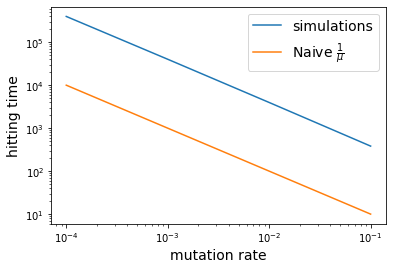

In [45]:
import matplotlib.pyplot as plt

mut_rates = [.1/1000,1/1000,10/1000,100/1000]

numTrials = 500
times = [getAverageHittingTime(mut,numTrials) for mut in mut_rates]
naive = [1/mut for mut in mut_rates]
plt.plot(mut_rates,times, label = 'simulations')
plt.plot(mut_rates,naive, label = "Naive " +r"$ \frac{1}{\mu}$")
plt.xlabel("mutation rate",fontsize = 14)
plt.ylabel("hitting time",fontsize = 14)
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize = 14)
plt.show()